In [67]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
import pandas as pd
train=pd.read_csv('/content/train.csv',encoding='latin-1')
test=pd.read_csv('/content/test.csv',encoding='latin-1')

In [69]:
test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [70]:
x_train=train['text']
y_train=train['sentiment']
x_test=train['text']
y_test=train['sentiment']

In [71]:
vocab_size = 10000
max_len = 200  # maximum length of a sequence
embedding_dim = 16

In [73]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [74]:
def stemming(sentence):
    if isinstance(sentence, str):
        sentence = sentence.split()
        sentence=[ps.stem(word) for word in sentence]
        splited_stemmed_sen=[word for word in sentence]
        stemmed_sentence = ' '.join(splited_stemmed_sen)
        return stemmed_sentence
    else:
        return sentence

In [75]:
x_train=x_train.apply(stemming)
x_test=x_test.apply(stemming)

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [77]:
x_train=x_train.astype(str)

In [78]:
max_words= 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
max_sequence_length=60
x_train=pad_sequences(sequences, maxlen=max_sequence_length)

In [79]:
x_train

array([[   0,    0,    0, ...,    1,  158,   21],
       [   0,    0,    0, ...,   10, 1274, 2167],
       [   0,    0,    0, ...,    9, 4267,   17],
       ...,
       [   0,    0,    0, ...,  568,  834, 2671],
       [   0,    0,    0, ...,   29,  669,    5],
       [   0,    0,    0, ..., 4148,  230,  946]], dtype=int32)

In [80]:
x_test = x_test.astype(str)

In [81]:
max_words= 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_test)
sequences = tokenizer.texts_to_sequences(x_test)
max_sequence_length=60
x_test=pad_sequences(sequences, maxlen=max_sequence_length)
x_test

array([[   0,    0,    0, ...,    1,  158,   21],
       [   0,    0,    0, ...,   10, 1274, 2167],
       [   0,    0,    0, ...,    9, 4267,   17],
       ...,
       [   0,    0,    0, ...,  568,  834, 2671],
       [   0,    0,    0, ...,   29,  669,    5],
       [   0,    0,    0, ..., 4148,  230,  946]], dtype=int32)

In [82]:
train=train.dropna(axis=0)
test=test.dropna(axis=0)

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [86]:
y_train

array([1, 0, 0, ..., 2, 2, 1])

In [84]:
x_test

array([[   0,    0,    0, ...,    1,  158,   21],
       [   0,    0,    0, ...,   10, 1274, 2167],
       [   0,    0,    0, ...,    9, 4267,   17],
       ...,
       [   0,    0,    0, ...,  568,  834, 2671],
       [   0,    0,    0, ...,   29,  669,    5],
       [   0,    0,    0, ..., 4148,  230,  946]], dtype=int32)

In [85]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [96]:
import tensorflow as tf
from tensorflow.keras import layers, models


def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


input_shape = (60, 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.4064 - loss: -42402.5742 - val_accuracy: 0.4045 - val_loss: -1263542.1250
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.4055 - loss: -9565120.0000 - val_accuracy: 0.4046 - val_loss: -74139752.0000
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.4035 - loss: -90923672.0000 - val_accuracy: 0.4047 - val_loss: -420507808.0000
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4039 - loss: -365775040.0000 - val_accuracy: 0.4047 - val_loss: -1549497984.0000
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4033 - loss: -2994953216.0000 - val_accuracy: 0.4047 - val_loss: -4601148416.0000
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.4066 - loss: -6016691712.0000 - val_accuracy: 0.4046 - val_loss: -9205547008.0000
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.4069 - loss: -12772213760.0000 - val_accuracy: 0.

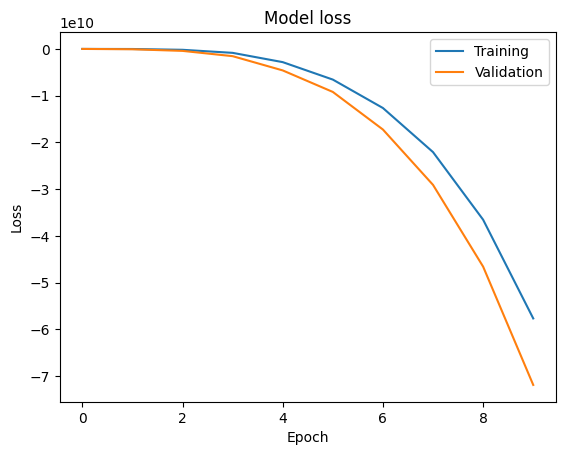

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

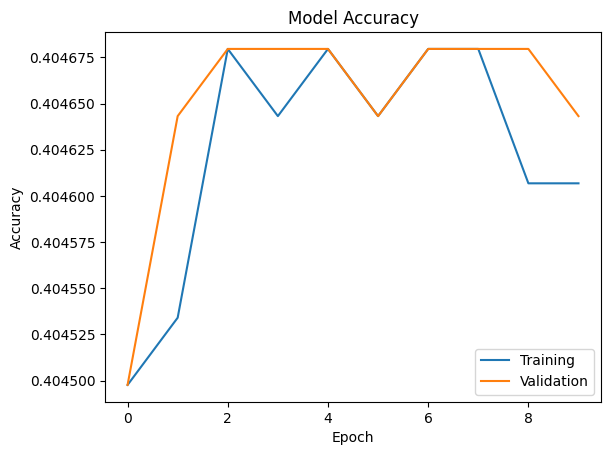

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()